In [2]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import os

# Benchmarking the System Performance

In [3]:
run_id = 'Algorithm1_apple_etc'

In [4]:
os.mkdir(run_id)

In [5]:
dir_ = './' + run_id + '/'

This Jupyter notebook serves to benchmark the performance of the prototype system.

### Loading and importing the system

In [160]:
%run ../tools/dataloader.py
%run ../system/activate.py

### Loading and importing financial data to forecast and to benchmark the system on

In [161]:
predict = DataLoader('BP', '2018-02-01', '2018-05-01')
predict = predict.get_adjclose()

In [162]:
predict_req, real = data_prep(predict, 20, 30) # dividing data into predictor input and real data

### Individual predictor forecasts

In [163]:
individual_predictors_forecasts = individual_predictors_pretrained_BP_30_5(predict_req, 30)

### System disagreement between individual predictor forecasts

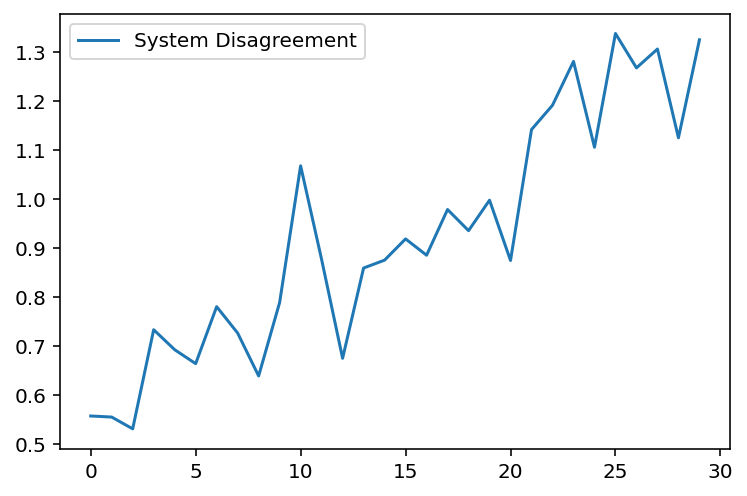

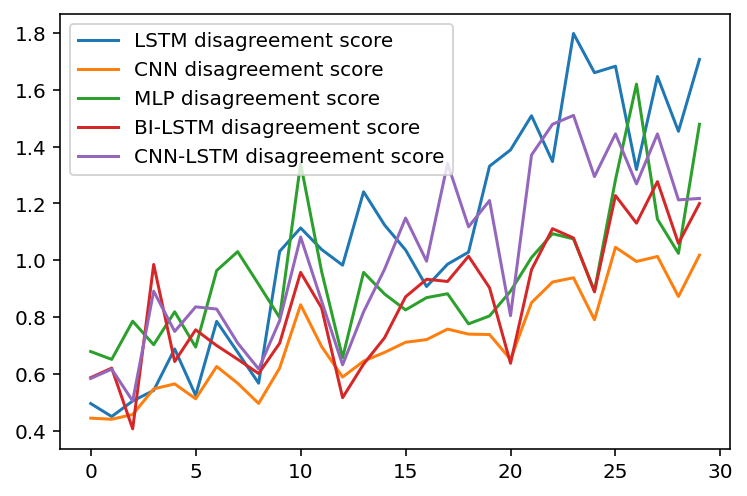

In [164]:
system_disagreement(individual_predictors_forecasts)

### Building consensus forecast values

In [165]:
consensus_forecasts = consensus(individual_predictors_forecasts, real)

In [166]:
all_forecasts = combined_frame(individual_predictors_forecasts, consensus_forecasts, real)

In [167]:
summary = all_stats_frame(all_forecasts, individual_predictors_forecasts) # combining individual predictor forecasts, consensus forecasts and disagreement scores
summary

,Average,NoMemory,Memory,Focus,Anchor,Real Value,LSTM,CNN,MLP,BI-LSTM,CNN-LSTM,System Disagreement,LSTM disagreement score,CNN disagreement score,MLP disagreement score,BI-LSTM disagreement score,CNN-LSTM disagreement score
Date,,,,,,,,,,,,,,,,,
2018-03-02,32.057995,32.057995,32.057995,32.057995,32.523025,31.549549,31.623466,31.880047,32.736618,31.471310,32.578533,0.557709,0.495391,0.444075,0.678623,0.586685,0.583772
2018-03-05,32.065960,31.953417,32.009688,31.729818,31.986536,31.924553,31.729818,31.777794,32.716793,31.445732,32.659660,0.555514,0.449776,0.440181,0.650834,0.620227,0.616554
2018-03-06,32.022451,31.957288,31.967768,31.597425,32.030640,32.242489,31.517956,31.597425,32.807880,31.849337,32.339657,0.531533,0.504495,0.456813,0.785429,0.406431,0.504495
2018-03-07,32.012259,32.043612,31.972258,32.903393,32.150193,32.046844,31.784128,31.757584,32.589111,31.027081,32.903393,0.733464,0.541568,0.546877,0.702565,0.985179,0.891133
2018-03-08,31.812527,31.797720,31.773543,31.124746,31.774269,32.169121,31.124746,31.592314,32.631039,31.198761,32.515774,0.692736,0.687780,0.564661,0.818512,0.643372,0.749353
2018-03-09,31.950656,32.004453,31.932180,32.786556,32.035747,32.332169,31.580156,31.640572,32.550377,31.195620,32.786556,0.664335,0.524314,0.512231,0.694193,0.755037,0.835900
2018-03-12,31.626331,31.700479,31.614635,32.589863,31.746764,32.487061,30.841606,31.352814,32.589863,30.983175,32.364197,0.780406,0.784725,0.625856,0.963532,0.699783,0.828132
2018-03-13,31.628548,31.747339,31.634263,32.658768,31.796463,32.242489,30.952255,31.415283,32.658768,30.993832,32.122601,0.726687,0.676292,0.567056,1.030220,0.651347,0.708520
2018-03-14,31.546650,31.622090,31.559809,31.965233,31.623198,31.688131,31.002180,31.358593,32.461731,30.945511,31.965233,0.639279,0.567137,0.495855,0.915081,0.601139,0.617183


In [14]:
summary.to_csv(dir_ + run_id + '_Forecast_Summary.csv')

### Absolute error analysis of individual predictors and consensus forecasts

In [168]:
prediction_error = absolute_error_analytics(individual_predictors_forecasts, consensus_forecasts, real)
prediction_error

,LSTM absolute error,CNN absolute error,MLP absolute error,BI-LSTM absolute error,CNN-LSTM absolute error,Average absolute error,NoMemory absolute error,Memory absolute error,Focus absolute error,Anchor absolute error,LSTM disagreement score,CNN disagreement score,MLP disagreement score,BI-LSTM disagreement score,CNN-LSTM disagreement score,System Disagreement
Date,,,,,,,,,,,,,,,,
2018-03-02,0.073917,0.330498,1.187069,0.078239,1.028984,0.508446,0.508446,0.508446,0.508446,0.973476,0.495391,0.444075,0.678623,0.586685,0.583772,0.557709
2018-03-05,0.194735,0.146759,0.792240,0.478821,0.735107,0.141407,0.028864,0.085135,0.194735,0.061983,0.449776,0.440181,0.650834,0.620227,0.616554,0.555514
2018-03-06,0.724533,0.645063,0.565392,0.393152,0.097168,0.220038,0.285200,0.274721,0.645063,0.211849,0.504495,0.456813,0.785429,0.406431,0.504495,0.531533
2018-03-07,0.262716,0.289261,0.542267,1.019764,0.856548,0.034585,0.003233,0.074587,0.856548,0.103348,0.541568,0.546877,0.702565,0.985179,0.891133,0.733464
2018-03-08,1.044374,0.576807,0.461918,0.970360,0.346653,0.356594,0.371400,0.395578,1.044374,0.394852,0.687780,0.564661,0.818512,0.643372,0.749353,0.692736
2018-03-09,0.752012,0.691597,0.218208,1.136549,0.454388,0.381512,0.327715,0.399988,0.454388,0.296421,0.524314,0.512231,0.694193,0.755037,0.835900,0.664335
2018-03-12,1.645454,1.134247,0.102802,1.503885,0.122864,0.860730,0.786582,0.872425,0.102802,0.740297,0.784725,0.625856,0.963532,0.699783,0.828132,0.780406
2018-03-13,1.290234,0.827206,0.416279,1.248657,0.119888,0.613941,0.495150,0.608226,0.416279,0.446026,0.676292,0.567056,1.030220,0.651347,0.708520,0.726687
2018-03-14,0.685951,0.329538,0.773600,0.742620,0.277102,0.141482,0.066041,0.128322,0.277102,0.064933,0.567137,0.495855,0.915081,0.601139,0.617183,0.639279


In [16]:
prediction_error.to_csv(dir_ + run_id + '_Prediction_Errors.csv')

### Correlation matrix of individual predictor and consensus forecast absolute errors

In [ ]:
correlation_ = correlation(prediction_error, True)
correlation_

,LSTM absolute error,CNN absolute error,MLP absolute error,BI-LSTM absolute error,CNN-LSTM absolute error,Average absolute error,NoMemory absolute error,Memory absolute error,Focus absolute error,Anchor absolute error,LSTM disagreement score,CNN disagreement score,MLP disagreement score,BI-LSTM disagreement score,CNN-LSTM disagreement score,System Disagreement
LSTM absolute error,1.000000,0.979551,0.896150,0.971669,0.862986,0.984193,0.982053,0.982849,0.878228,0.967329,0.910768,0.907563,0.687235,0.785409,0.819510,0.919860
CNN absolute error,0.979551,1.000000,0.915344,0.974770,0.912816,0.992493,0.993104,0.993340,0.920793,0.983014,0.827500,0.864083,0.712537,0.760654,0.759198,0.870832
MLP absolute error,0.896150,0.915344,1.000000,0.909202,0.938706,0.936876,0.940665,0.937520,0.926633,0.942741,0.734994,0.760377,0.569030,0.734964,0.689558,0.774950
BI-LSTM absolute error,0.971669,0.974770,0.909202,1.000000,0.885733,0.981889,0.979587,0.981567,0.892225,0.967180,0.812864,0.902575,0.704271,0.864869,0.833308,0.907625
CNN-LSTM absolute error,0.862986,0.912816,0.938706,0.885733,1.000000,0.914990,0.920294,0.917275,0.963495,0.923040,0.682523,0.724571,0.628291,0.706988,0.582339,0.731748
Average absolute error,0.984193,0.992493,0.936876,0.981889,0.914990,1.000000,0.999554,0.999842,0.911356,0.994327,0.838619,0.866715,0.669158,0.785270,0.782807,0.877028
NoMemory absolute error,0.982053,0.993104,0.940665,0.979587,0.920294,0.999554,1.000000,0.999794,0.918783,0.994873,0.833218,0.861212,0.667175,0.778546,0.773518,0.870480
Memory absolute error,0.982849,0.993340,0.937520,0.981567,0.917275,0.999842,0.999794,1.000000,0.915370,0.994753,0.833530,0.862882,0.669217,0.782151,0.777382,0.872846
Focus absolute error,0.878228,0.920793,0.926633,0.892225,0.963495,0.911356,0.918783,0.915370,1.000000,0.914544,0.702629,0.755829,0.665779,0.700347,0.591173,0.751256
Anchor absolute error,0.967329,0.983014,0.942741,0.967180,0.923040,0.994327,0.994873,0.994753,0.914544,1.000000,0.811640,0.837127,0.635544,0.764827,0.752932,0.845978


In [20]:
correlation_.to_csv(dir_ + run_id + '_Error_Correlation.csv')

### MAE, MSE and MSE log scores

,Algorithms,MSE
0,Average,5.948971
1,NoMemory,5.646820
2,Memory,5.736946
3,Focus,2.675140
4,Anchor,3.807033
5,LSTM,10.788967
6,CNN,4.920770
7,MLP,2.668088
8,BI-LSTM,7.840129


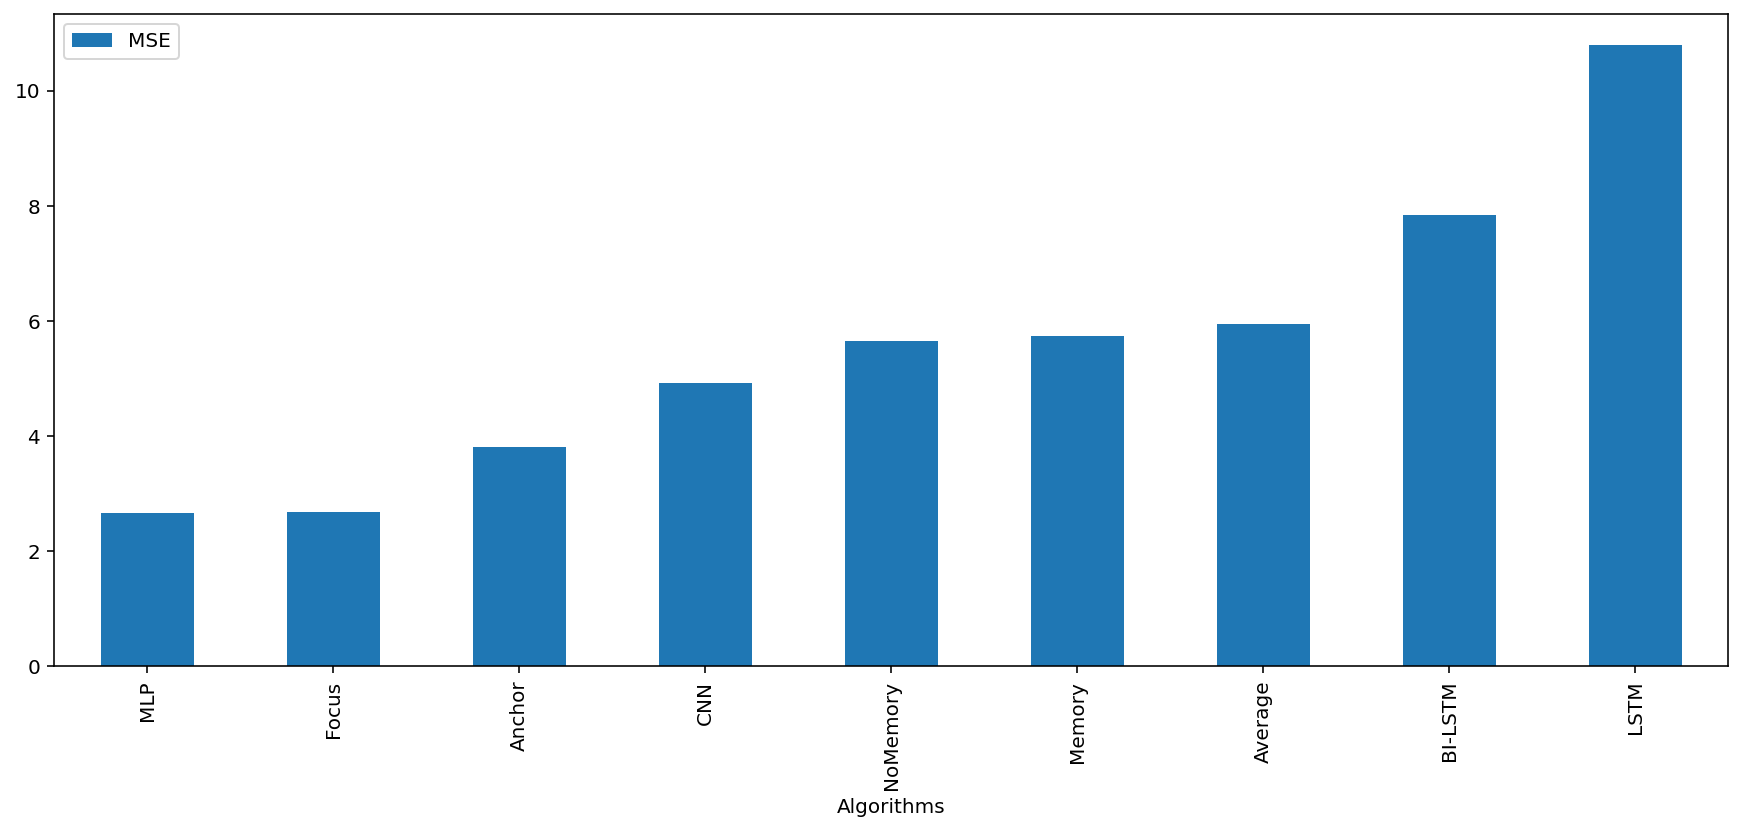

In [157]:
mse = mse_score(all_forecasts, True)
mse

In [22]:
mse.to_csv(dir_ + run_id + '_MSE_score.csv')

,Algorithms,MSE Log
0,Average,0.005374
1,NoMemory,0.005085
2,Memory,0.005171
3,Focus,0.002325
4,Anchor,0.003359
5,LSTM,0.010153
6,CNN,0.004395
7,MLP,0.002314
8,BI-LSTM,0.007209


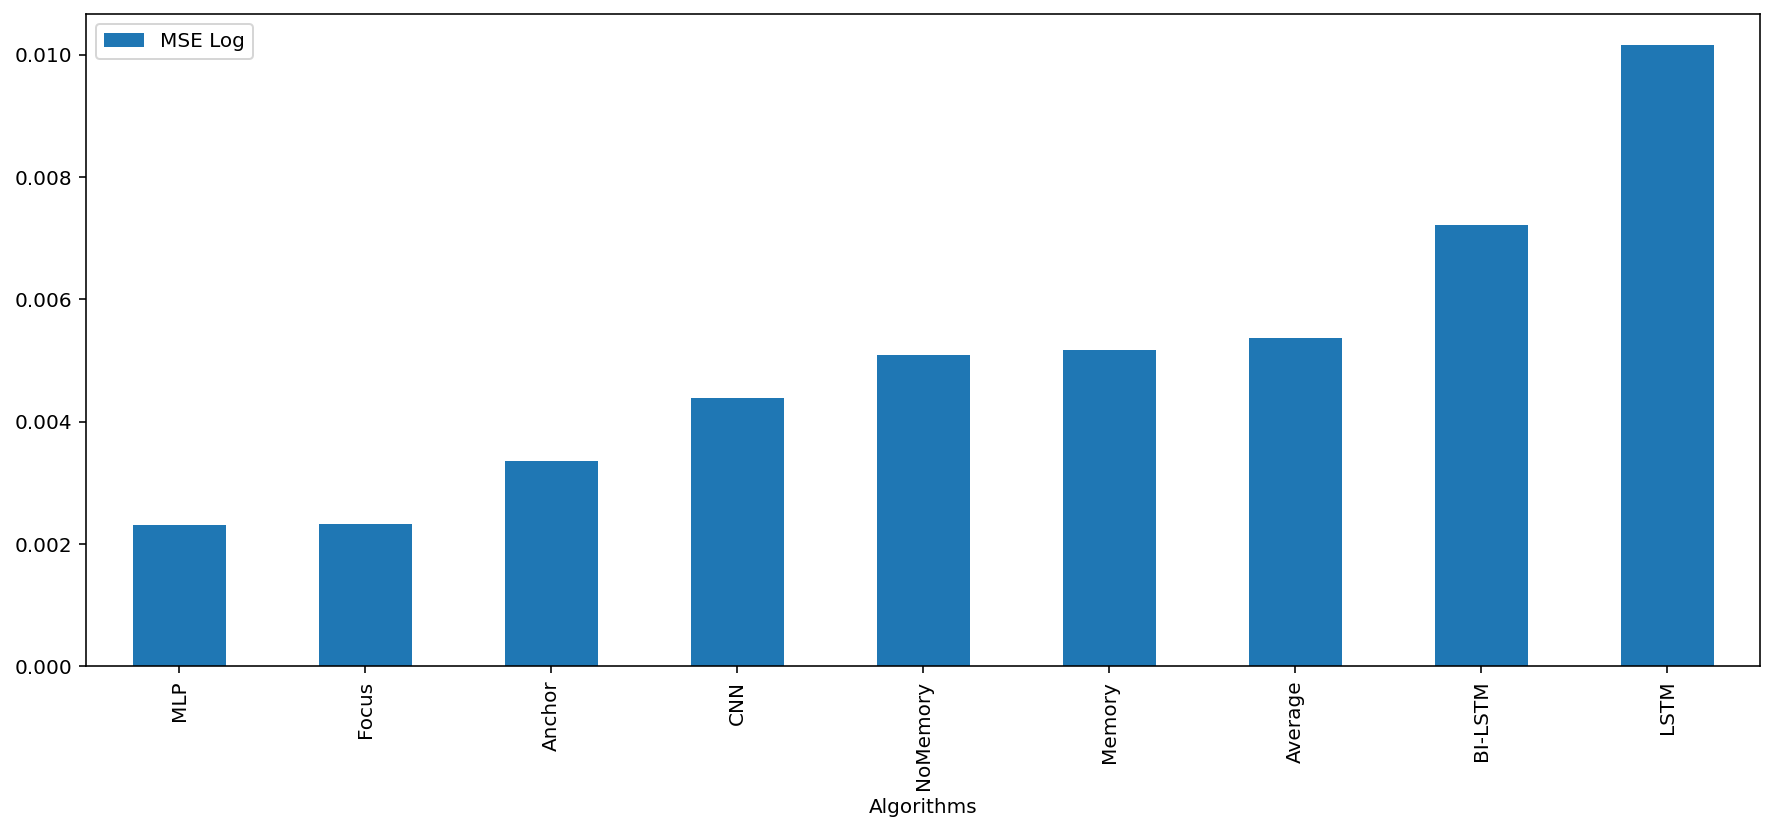

In [158]:
mse_log = mse_log_score(all_forecasts, True)
mse_log

In [24]:
mse_log.to_csv(dir_ + run_id + '_MSE_log_score.csv')

,Algorithms,MAE
0,Average,1.856731
1,NoMemory,1.795041
2,Memory,1.834252
3,Focus,1.247456
4,Anchor,1.498252
5,LSTM,2.660135
6,CNN,1.705221
7,MLP,1.246561
8,BI-LSTM,2.249527


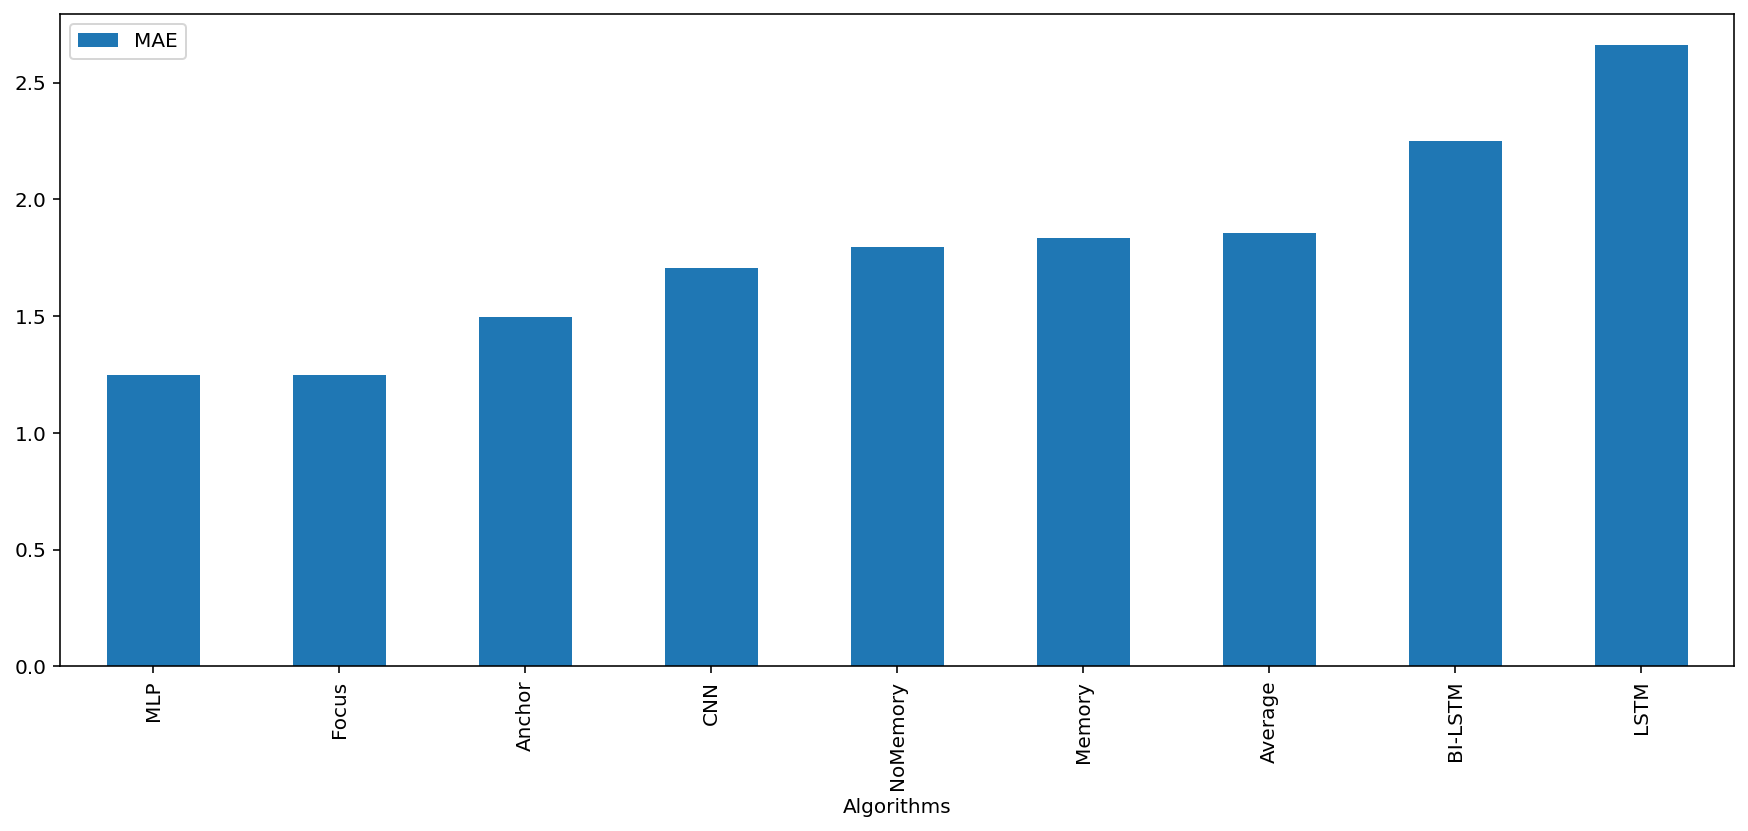

In [159]:
mae = mae_score(all_forecasts, True)
mae

In [26]:
mae.to_csv(dir_ + run_id + '_MAE_score.csv')

### Performance plotting of all forecasting algorithms

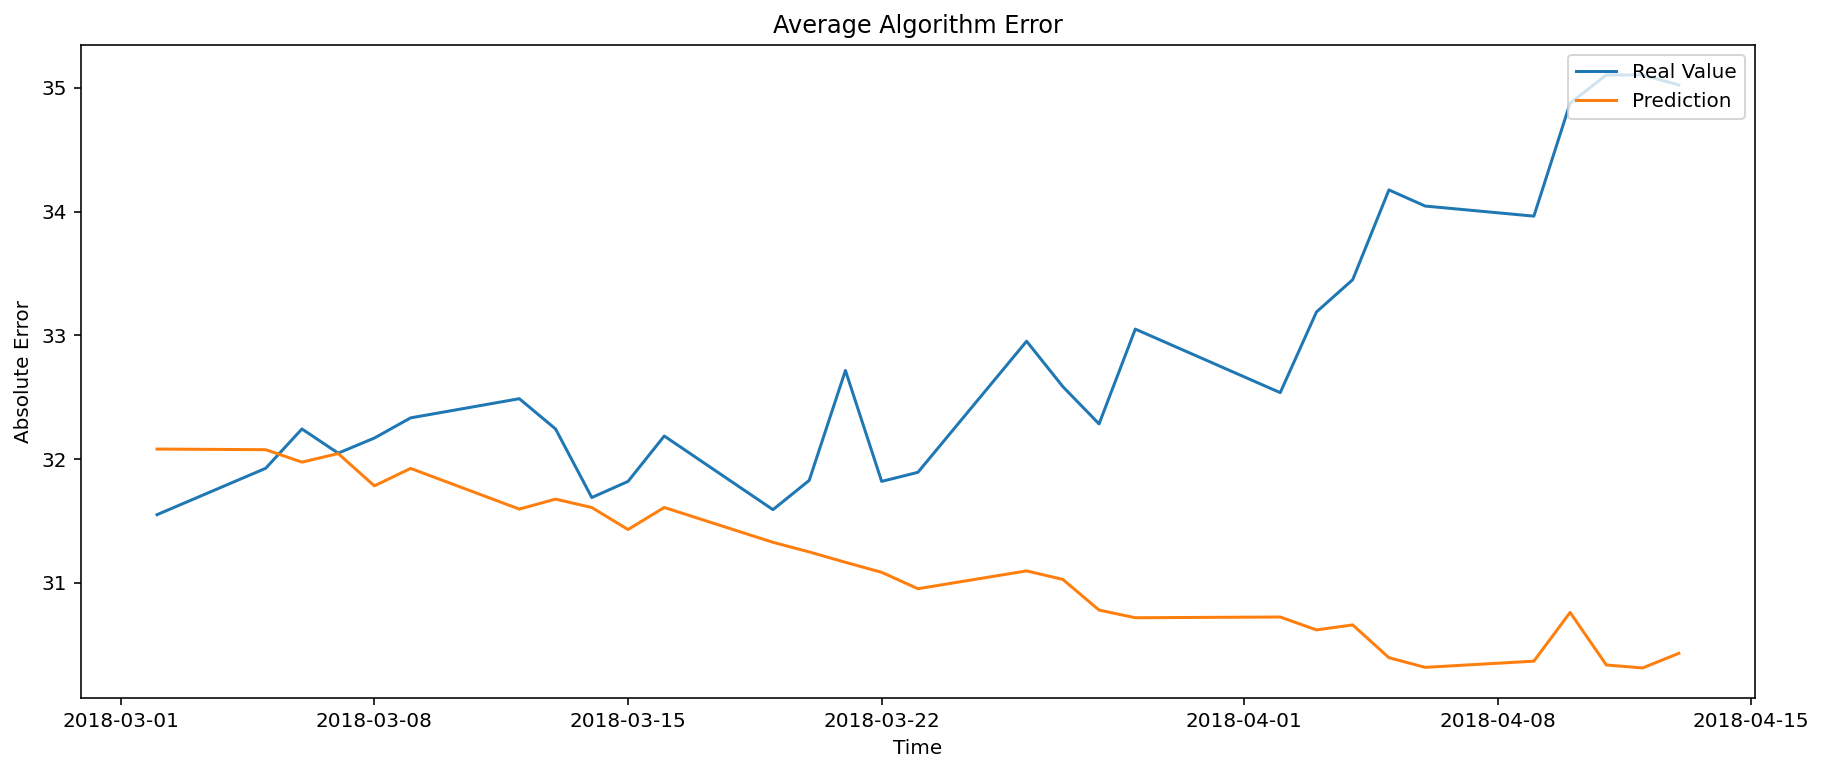

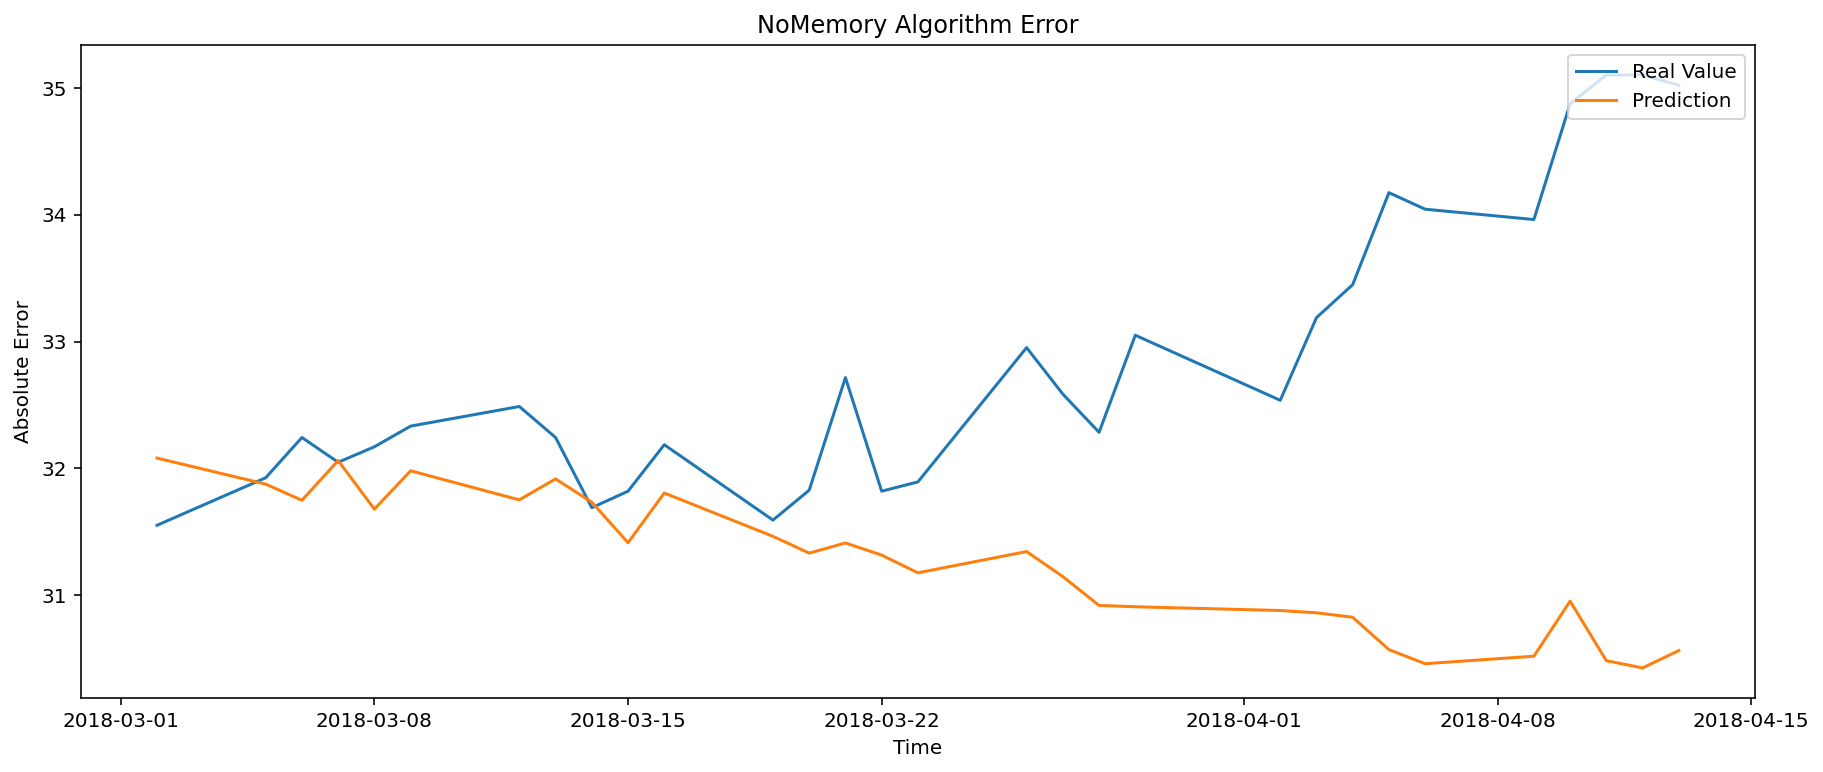

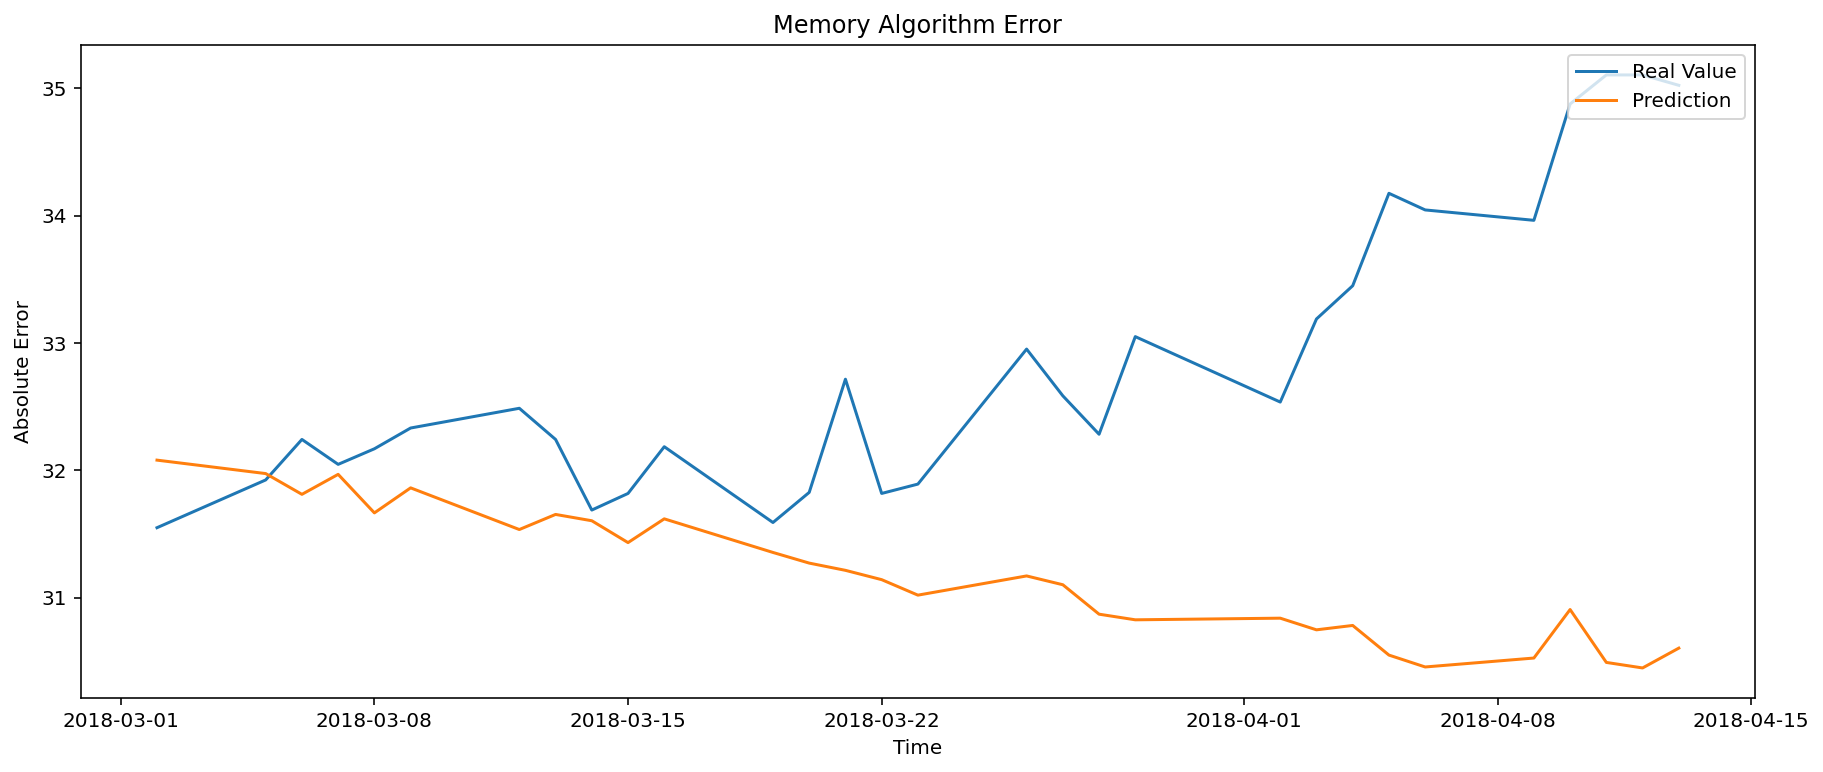

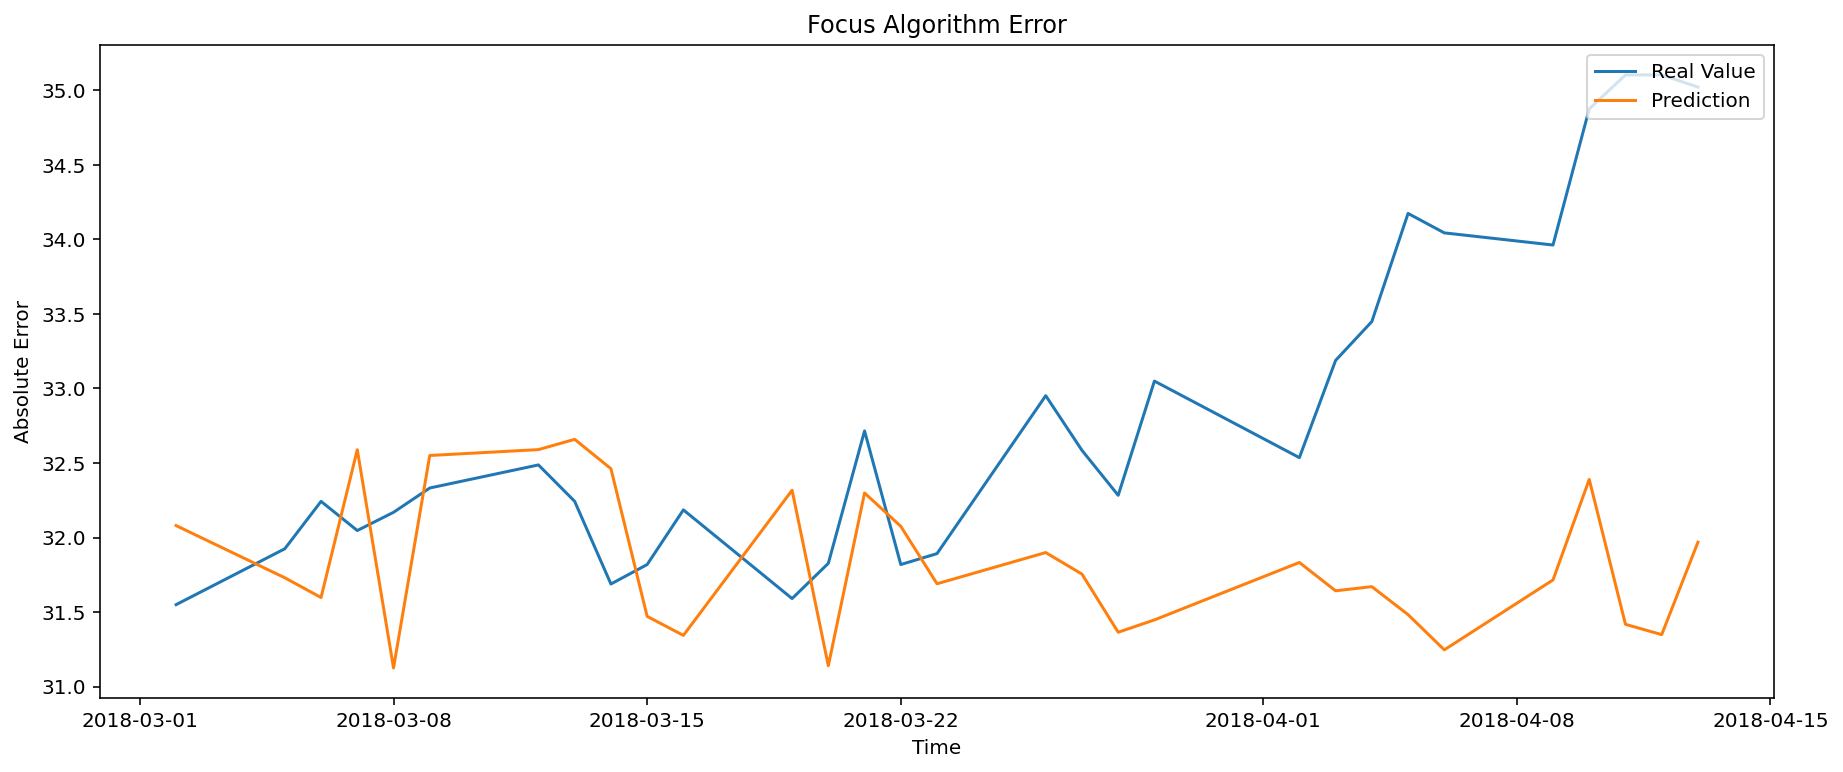

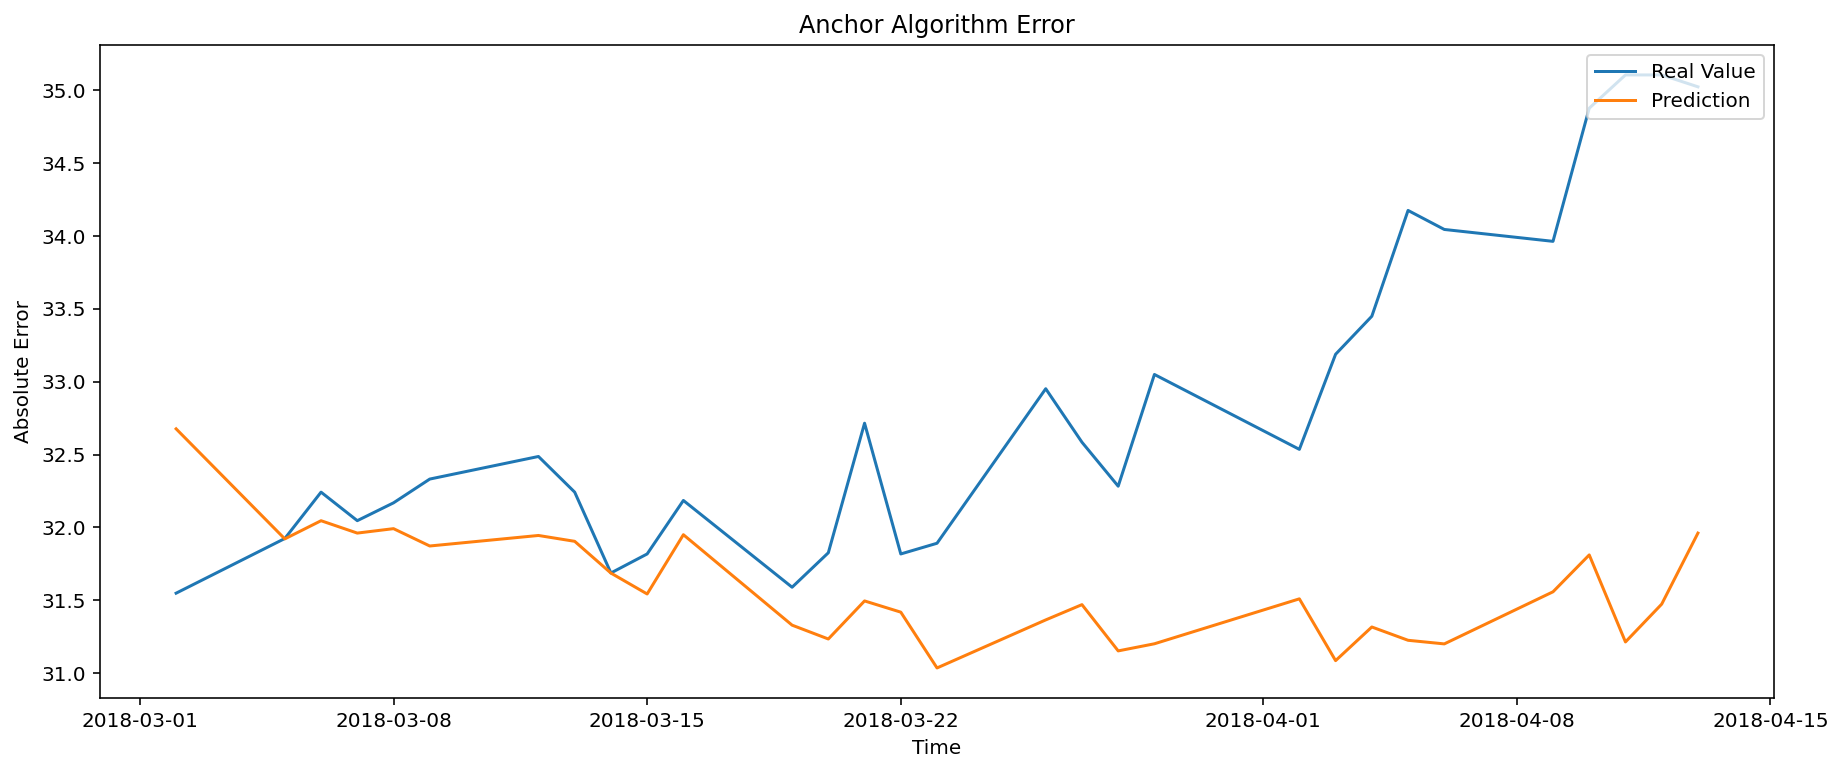

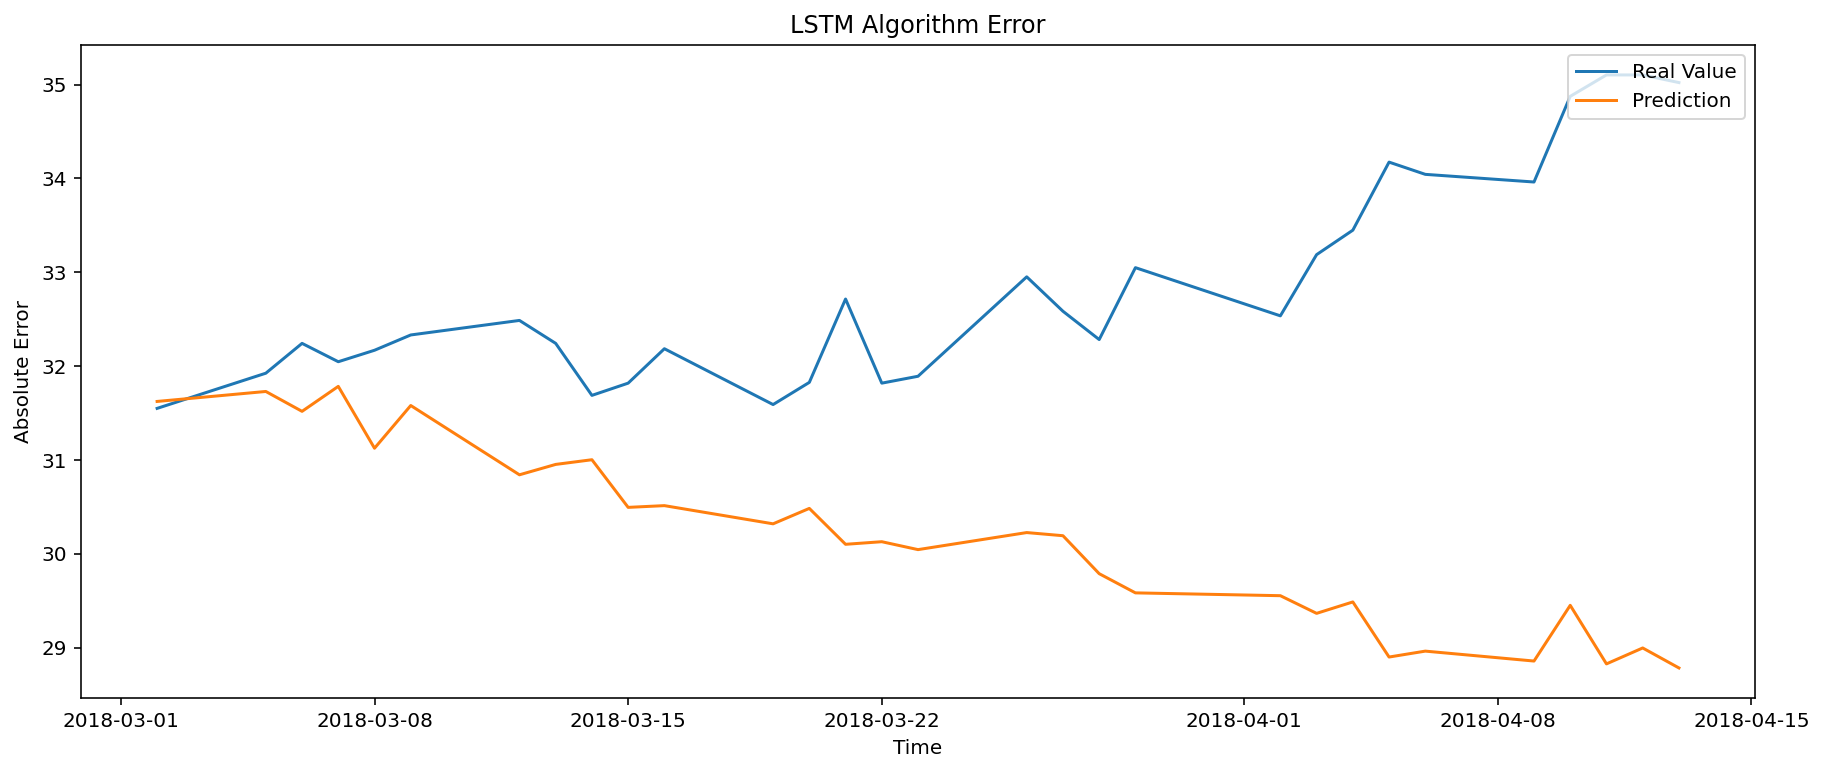

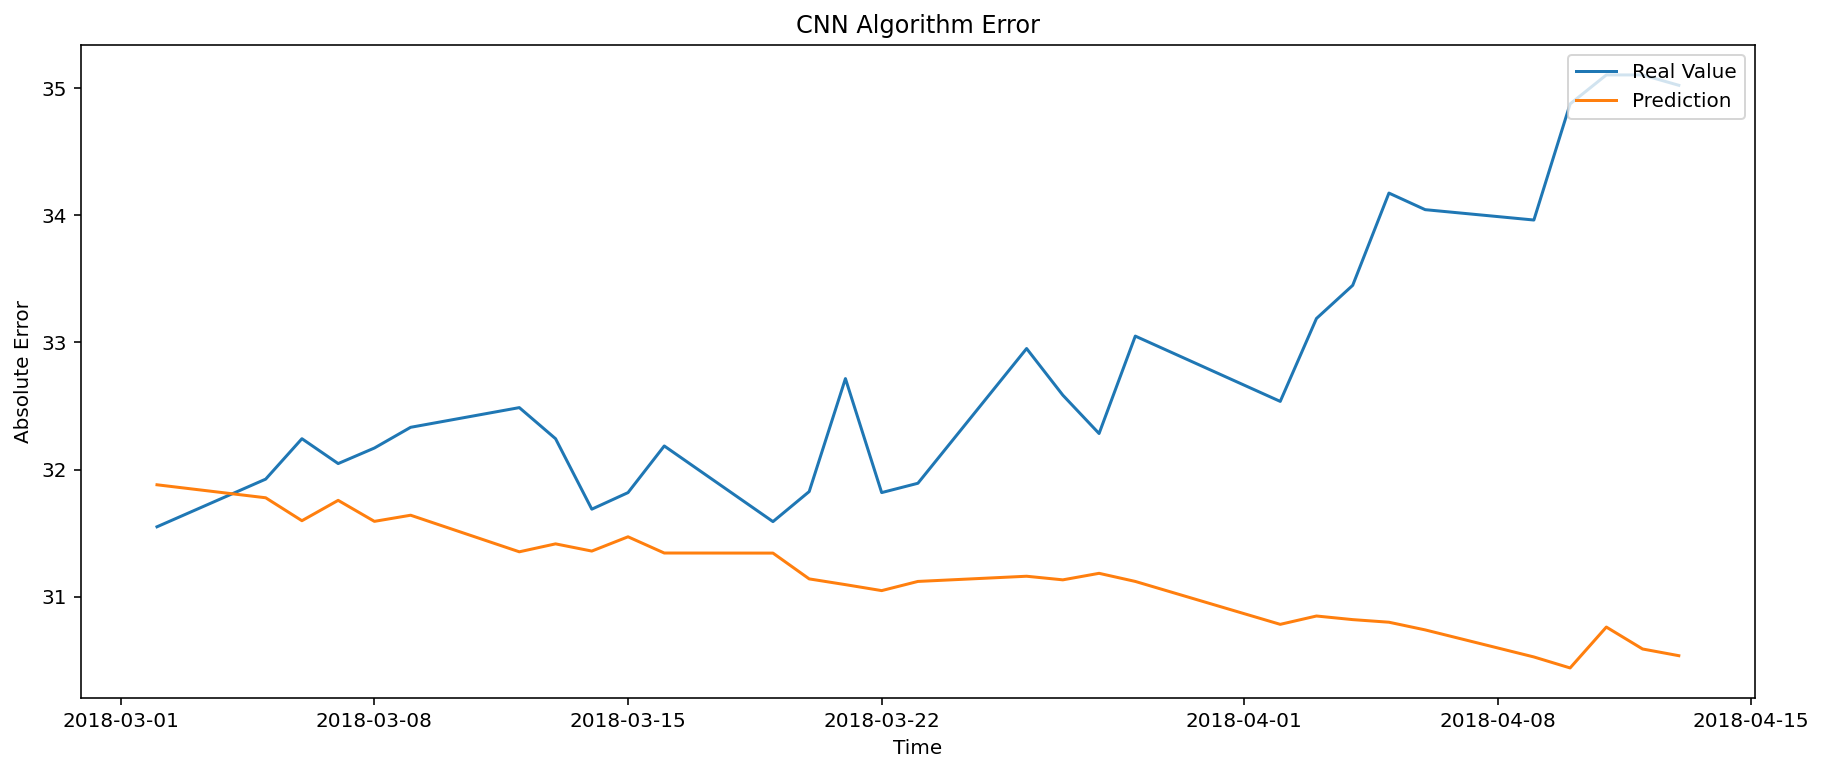

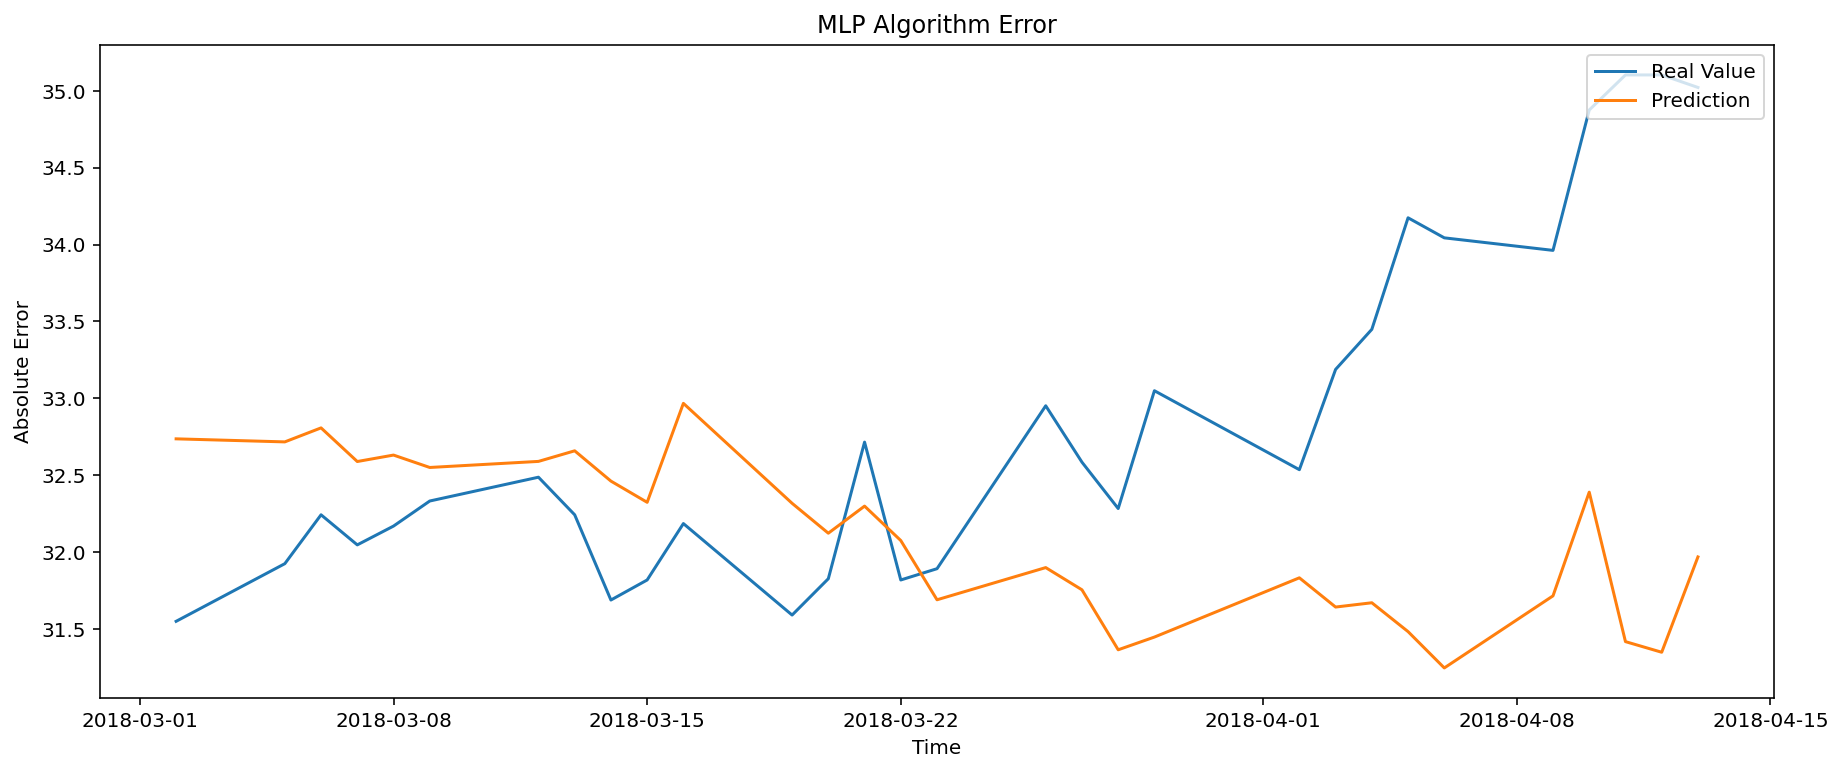

In [148]:
plot_performance(all_forecasts)